In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout
from keras.utils import to_categorical
import numpy as np
from keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
from matplotlib import gridspec
import PIL


Using TensorFlow backend.


In [12]:
!ls images

Albrecht_Dürer            Frida_Kahlo               Pablo_Picasso
Albrecht_Du╠êrer          Georges_Seurat            Paul_Cezanne
Alfred_Sisley             Giotto_di_Bondone         Paul_Gauguin
Amedeo_Modigliani         Gustav_Klimt              Paul_Klee
Andrei_Rublev             Gustave_Courbet           Peter_Paul_Rubens
Andy_Warhol               Henri_Matisse             Pierre-Auguste_Renoir
Camille_Pissarro          Henri_Rousseau            Piet_Mondrian
Caravaggio                Henri_de_Toulouse-Lautrec Pieter_Bruegel
Claude_Monet              Hieronymus_Bosch          Raphael
Diego_Rivera              Jackson_Pollock           Rembrandt
Diego_Velazquez           Jan_van_Eyck              Rene_Magritte
Edgar_Degas               Joan_Miro                 Salvador_Dali
Edouard_Manet             Kazimir_Malevich          Sandro_Botticelli
Edvard_Munch              Leonardo_da_Vinci         Titian
El_Greco                  Marc_Chagall              Vasiliy_Kandinskiy
Eugene_Dela

In [13]:
import os

#Images_Dir ='/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/images'
num_skipped = 0
Label= ["Albrecht_Du╠êrer","Frida_Kahlo", "Pablo_Picasso", "Albrecht_Du╠êrer", 
                    "Georges_Seurat", "Paul_Cezanne", "Alfred_Sisley", "Giotto_di_Bondone", 
                    "Paul_Gauguin", "Amedeo_Modigliani", "Gustav_Klimt", "Paul_Klee", "Andrei_Rublev", 
                    "Gustave_Courbet", "Peter_Paul_Rubens", "Andy_Warhol", "Henri_Matisse", 
                    "Pierre-Auguste_Renoir", "Camille_Pissarro", "Henri_Rousseau", "Piet_Mondrian", 
                    "Caravaggio", "Henri_de_Toulouse-Lautrec", "Pieter_Bruegel", "Claude_Monet", 
                    "Hieronymus_Bosch", "Raphael", "Diego_Rivera", "Jackson_Pollock", "Rembrandt", 
                    "Diego_Velazquez", "Jan_van_Eyck", "Rene_Magritte", "Edgar_Degas", "Joan_Miro", 
                    "Salvador_Dali", "Edouard_Manet", "Kazimir_Malevich", "Sandro_Botticelli", 
                    "Edvard_Munch", "Leonardo_da_Vinci", "Titian", "El_Greco", "Marc_Chagall", 
                    "Vasiliy_Kandinskiy", "Eugene_Delacroix", "Michelangelo", "Vincent_van_Gogh", 
                    "Francisco_Goya", "Mikhail_Vrubel", "William_Turner"]



# Check the shape of the Dataset

In [14]:
Art=!ls images

Art

['Albrecht_Dürer',
 'Albrecht_Du╠êrer',
 'Alfred_Sisley',
 'Amedeo_Modigliani',
 'Andrei_Rublev',
 'Andy_Warhol',
 'Camille_Pissarro',
 'Caravaggio',
 'Claude_Monet',
 'Diego_Rivera',
 'Diego_Velazquez',
 'Edgar_Degas',
 'Edouard_Manet',
 'Edvard_Munch',
 'El_Greco',
 'Eugene_Delacroix',
 'Francisco_Goya',
 'Frida_Kahlo',
 'Georges_Seurat',
 'Giotto_di_Bondone',
 'Gustav_Klimt',
 'Gustave_Courbet',
 'Henri_Matisse',
 'Henri_Rousseau',
 'Henri_de_Toulouse-Lautrec',
 'Hieronymus_Bosch',
 'Jackson_Pollock',
 'Jan_van_Eyck',
 'Joan_Miro',
 'Kazimir_Malevich',
 'Leonardo_da_Vinci',
 'Marc_Chagall',
 'Michelangelo',
 'Mikhail_Vrubel',
 'Pablo_Picasso',
 'Paul_Cezanne',
 'Paul_Gauguin',
 'Paul_Klee',
 'Peter_Paul_Rubens',
 'Pierre-Auguste_Renoir',
 'Piet_Mondrian',
 'Pieter_Bruegel',
 'Raphael',
 'Rembrandt',
 'Rene_Magritte',
 'Salvador_Dali',
 'Sandro_Botticelli',
 'Titian',
 'Vasiliy_Kandinskiy',
 'Vincent_van_Gogh',
 'William_Turner']

In [15]:
Images = tf.keras.preprocessing.image_dataset_from_directory("images")




Found 8774 files belonging to 51 classes.


In [16]:
image_size =256, 256
Batch_size=36


#train_ds=ImageDataGenerator(rescale=1./255.)
#val_ds=ImageDataGenerator(rescale=1./255.)
#test_ds=ImageDataGenerator(rescale=1./255.)

train_ds = ImageDataGenerator(
                    rescale=1./255,
                    rotation_range=45,
                    width_shift_range=.15,
                    height_shift_range=.15,
                    horizontal_flip=True,
                    zoom_range=0.5
                    )

train_generator=train_ds.flow_from_directory(
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/train", 
    
    batch_size="Batch_size",
    seed=1234,
    shuffle=True,
    class_mode="categorical",
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH)
    
    
    
)

valid_generator=train_ds.flow_from_directory( 
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/val",

    batch_size="Batch_size",
    seed=1234,
    shuffle=True,
    class_mode="categorical",
    target_size=(IMAGE_HEIGHT, IMAGE_WIDTH)
    
    
    

)
test_generator=train_ds.flow_from_directory(
    directory="/Users/olaoluwa/Documents/PGD/PROJECTS/Machine Learning2/Data Used/split/test",
    batch_size=1,
    seed=1234,
    shuffle=False,
    class_mode=None
)

Found 6997 images belonging to 51 classes.
Found 853 images belonging to 51 classes.
Found 924 images belonging to 51 classes.


## training Dataset shape

for image_batch, labels_batch in Images:
  print(image_batch.shape)
  break

# Configure the dataset for performance

Let's make sure to use buffered prefetching so we can yield data from disk without
 having I/O becoming blocking:

train_ds = train_ds.prefetch(buffer_size=36)
val_ds = val_ds.prefetch(buffer_size=36)

## Visualize the data

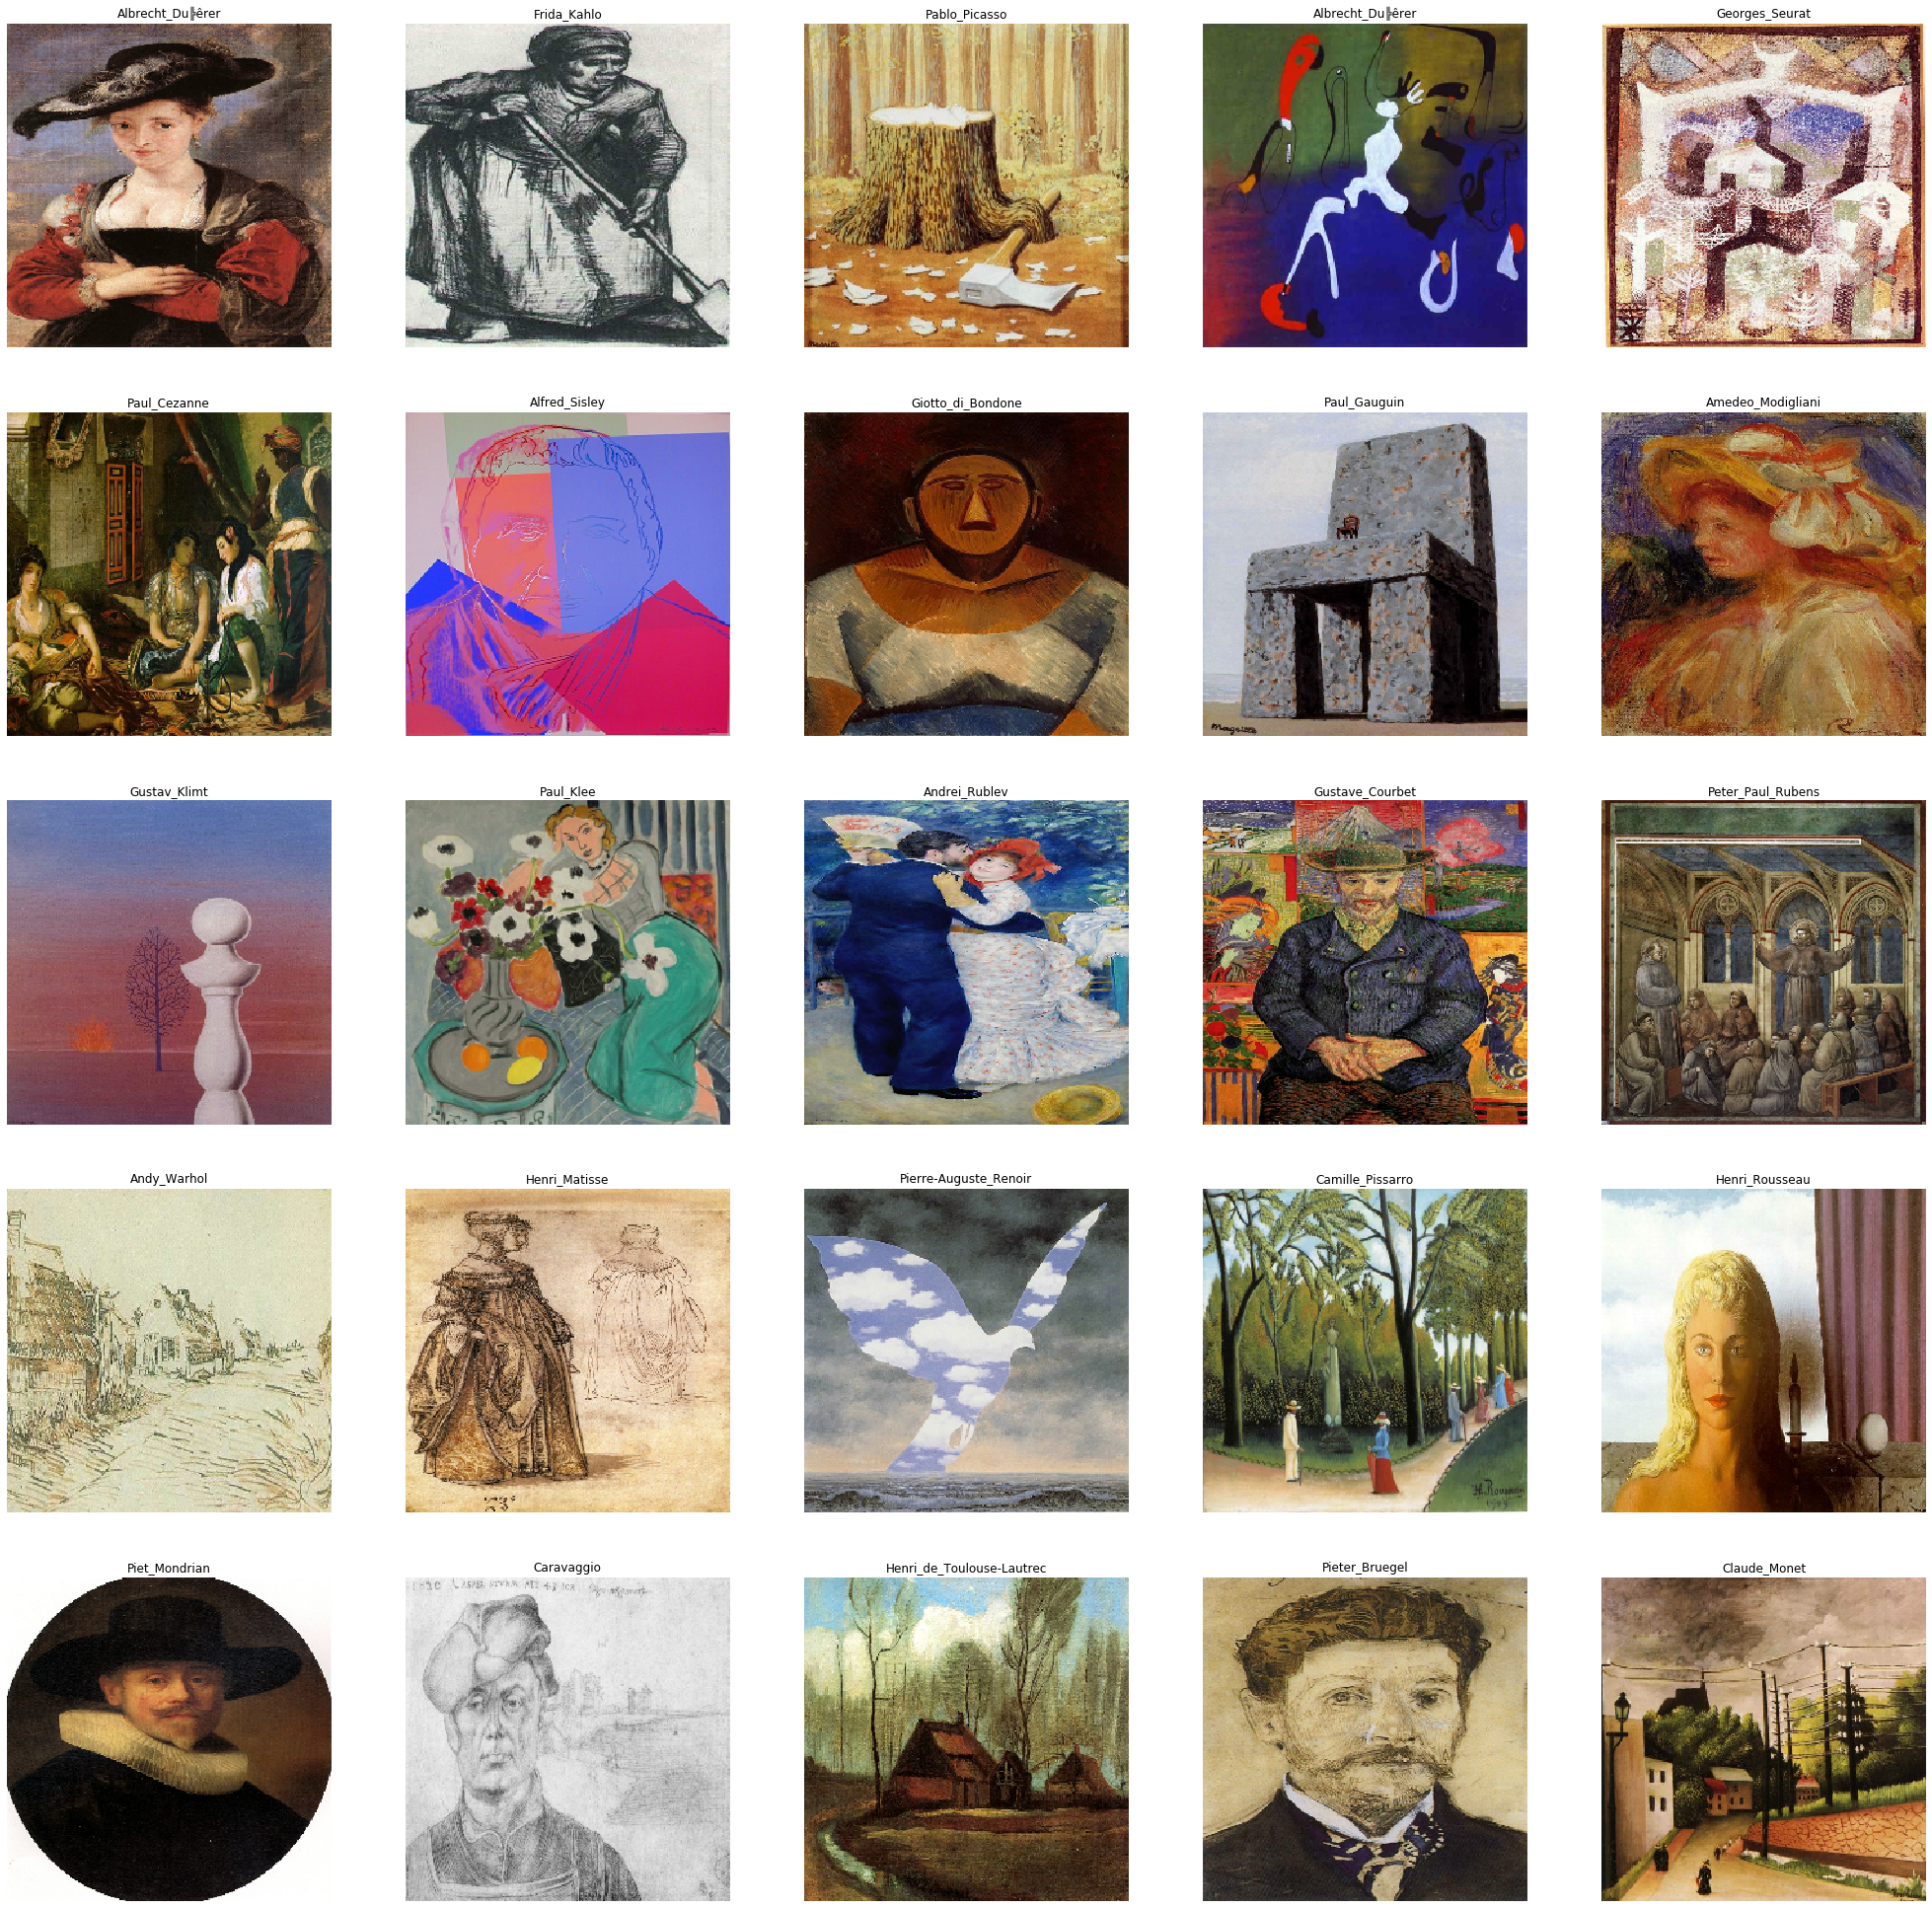

In [17]:
#Here are the first 16 images in the training dataset. As you can see, label

import matplotlib.pyplot as plt

plt.figure(figsize=(35,35))
for images, labels in Images.take(1):
    for i in range(25):
        ax = plt.subplot(5,5,i + 1)
        plt.imshow(images[i].numpy().astype("uint8"))
        plt.title(Label[i])
        plt.axis("off")

# Image augmentation

In [18]:

data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal_and_vertical"),
    layers.experimental.preprocessing.RandomRotation(0.25),
    layers.experimental.preprocessing.RandomZoom(0.2), 
    layers.experimental.preprocessing.RandomTranslation(0.3,0.2), 
    layers.experimental.preprocessing.RandomContrast(0.2)
  ]
)

Let's visualize what the augmented samples look like, by applying data_augmentation repeatedly to the first image in the dataset:

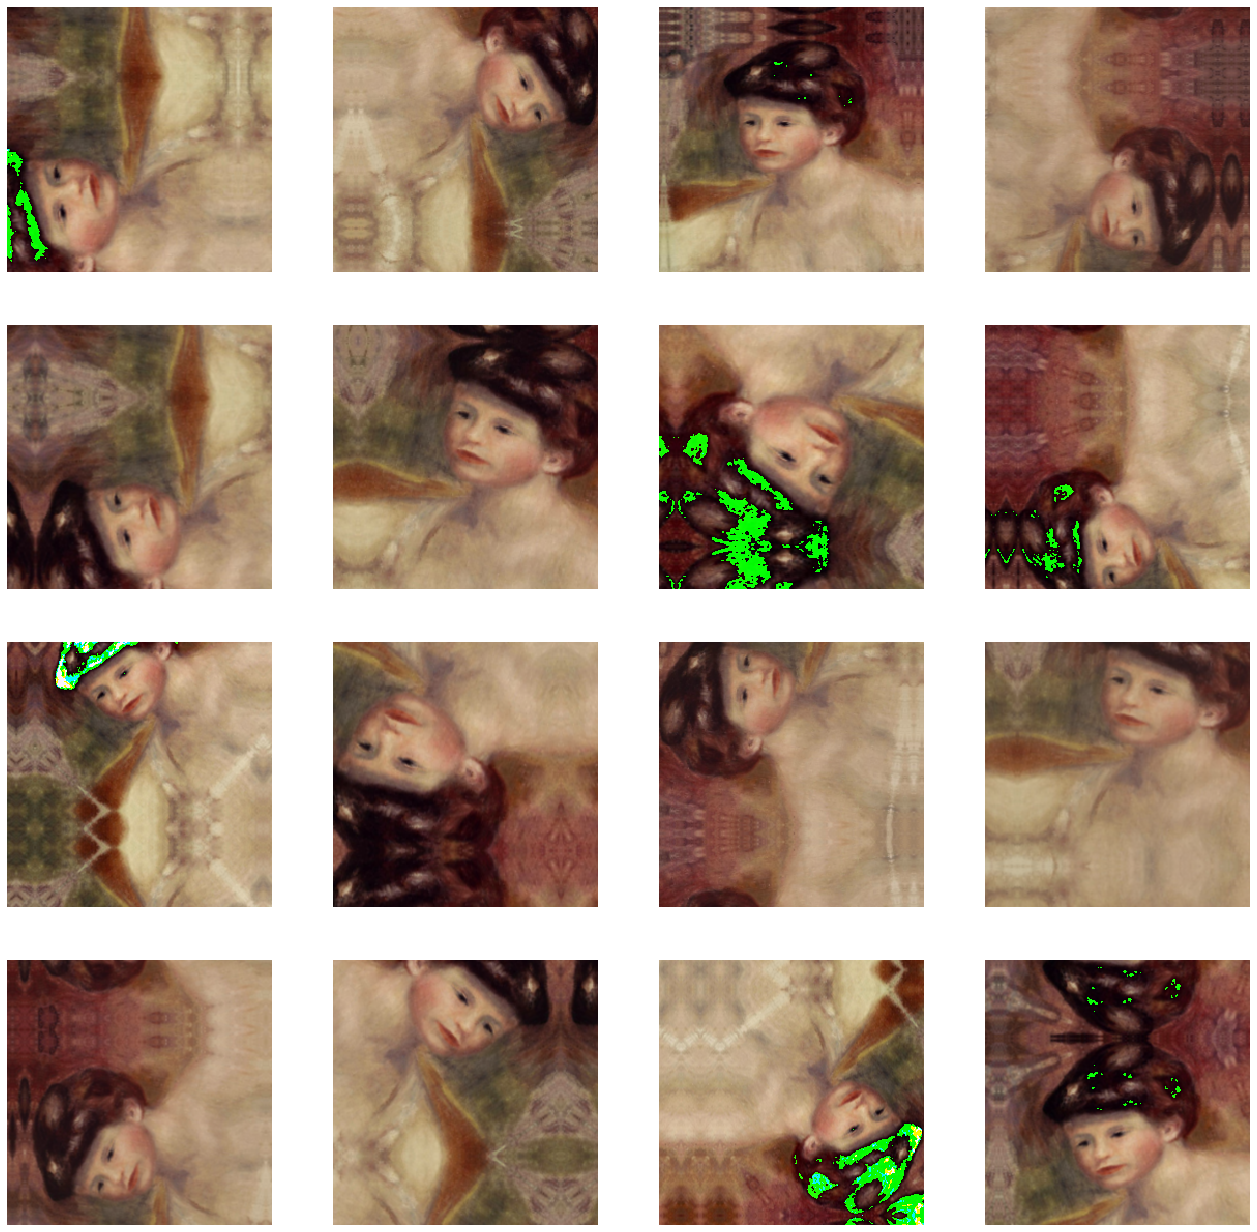

In [19]:
plt.figure(figsize=(22.4, 22.4))
for images, _ in Images.take(1):
    for i in range(16):
        augmented_images = data_augmentation(images)
        ax = plt.subplot(4, 4, i + 1)
        plt.imshow(augmented_images[0].numpy().astype("uint8"))
        plt.axis("off")

# Configure the dataset for performance

## Build a model

Note that:

- We start the model with the `data_augmentation` preprocessor, followed by a
 `Rescaling` layer.
- We include a `Dropout` layer before the final classification layer.


Consider the fact that CNNs reduce volume dimensions via two methods:

Pooling (such as max-pooling in VGG16)
Strided convolutions (such as in ResNet)

You can also make your input dimensions too large.

You won’t run into any errors per se, but you may see your network fail to obtain reasonable accuracy due to the fact that there are not enough layers in the network to:

Learn robust, discriminative filters.
Naturally reduce volume size via pooling or strided convolution.
If that happens, you have a few options:

Explore other (pre-trained) network architectures that are trained on larger input dimensions.
Tune your hyperparameters exhaustively, focusing first on learning rate.
Add additional layers to the network. For VGG16 you’ll use 3×3 CONV layers and max-pooling. For ResNet you’ll include residual layers with strided convolution.

https://www.pyimagesearch.com/2019/06/24/change-input-shape-dimensions-for-fine-tuning-with-keras/


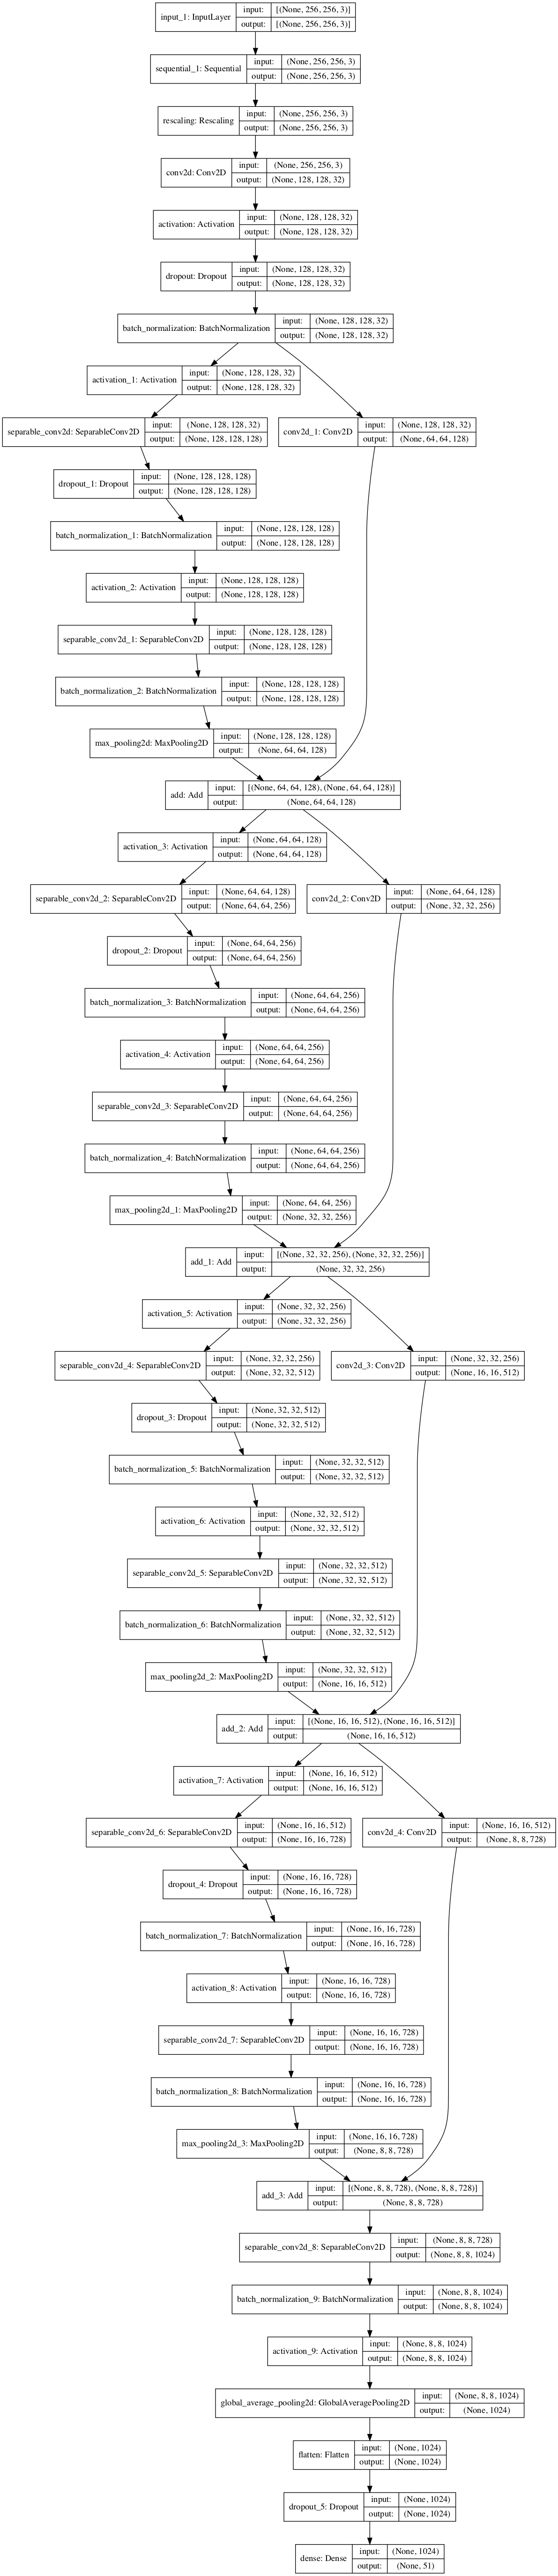

In [20]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)
    # Image augmentation block
    x = data_augmentation(inputs)

    # Entry block
    x = layers.experimental.preprocessing.Rescaling(1.0 / 255)(x)
    x = layers.Conv2D(32, 3, strides=2, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.Dropout(0.5)(x)
    x = layers.BatchNormalization()(x)




    previous_block_activation = x  # Set aside residual

    for size in [128, 256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size,3, padding="same")(x)
        x = layers.Dropout(0.5)(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    
    x = layers.Activation("relu")(x)
    
    
    x = layers.GlobalAveragePooling2D()(x)
    
    x = layers.Flatten()(x)
    if num_classes == 2:    


        activation = "sigmoid"
        units = 1
    else:
        activation = "softmax"
        units = num_classes

    x = layers.Dropout(0.5)(x)
    outputs = layers.Dense(units, activation=activation)(x)
    return keras.Model(inputs, outputs)




model = make_model(input_shape=image_size + (3,), num_classes=51)
keras.utils.plot_model(model, show_shapes=True)

 x = layers.Conv2D(64, 3, padding="same")(x)
    x = layers.Activation("relu")(x)
    x = layers.MaxPooling2D(3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    

In [ ]:
epochs =10

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.h5"),
]
model.compile(
    optimizer=keras.optimizers.Adam(1e-3),
    loss="categorical_crossentropy",
    metrics=["accuracy", "mean_squared_error"],
)
model.summary()

In [ ]:
history=model.fit(
  train_generator, epochs=epochs, callbacks=callbacks, validation_data=valid_generator,
)
print(history)

In [ ]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

# Plot history: MAE
plt.plot(history.history['loss'], label='MAE (training_data)')
plt.plot(history.history['val_loss'], label='MAE (validation_data)')
plt.title('MAE for Chennai Reservoir Levels')
plt.ylabel('MAE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
plt.plot(history.history['accuracy'], label='Training accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('training / validation accuracies')
plt.ylabel('Accuracy')
plt.xlabel('No.Epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Plot history: MSE
plt.plot(history.history['mean_squared_error'], label='MSE (training_data)')
plt.plot(history.history['val_mean_squared_error'], label='MSE (validation_data)')
plt.title('MSE for Chennai Reservoir Levels')
plt.ylabel('MSE value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()

In [ ]:
# Plot history: Categorical crossentropy & Accuracy
plt.plot(history.history['loss'], label='Categorical crossentropy (training_data)')
plt.plot(history.history['val_loss'], label='Categorical crossentropy (validation_data)')
plt.plot(history.history['accuracy'], label='Accuracy (training_data)')
plt.plot(history.history['val_accuracy'], label='Accuracy (validation_data)')
plt.title('Model performance for 3D MNIST Keras Conv3D example')
plt.ylabel('Loss value')
plt.xlabel('No. epoch')
plt.legend(loc="upper left")
plt.show()



# VGG16 model for Deep Convolutional Networks

#https://neurohive.io/en/popular-networks/vgg16/


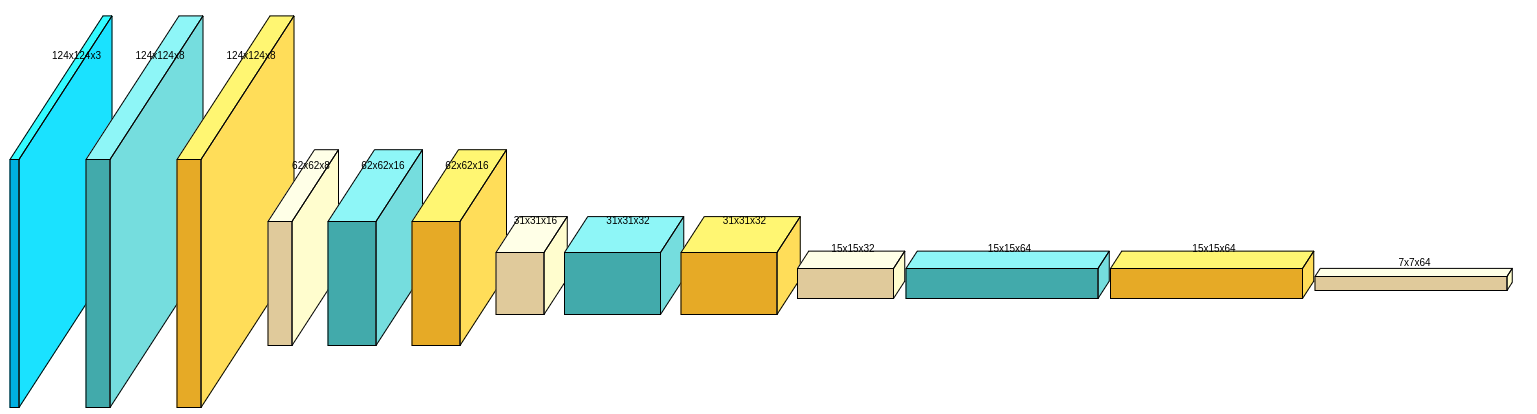
      

# Overfitting

Obviously, my model is overfitted! To overcome the problem of overfitting, there are some ways to do:

• Expand dataset

• Use regularization

• Add dropout layers

• tf.keras.layers.Dropout(0.5)

• Use batchnormalization

• tf.keras.layers.BatchNormalization()

Reference project: https://www.tensorflow.org/tutorials/images/data_augmentation

https://missinglink.ai/guides/keras/keras-conv2d-working-cnn-2d-convolutions-keras/
    Reference project: https://www.tensorflow.org/tutorials/images/data_augmentation
    
#CNN Achitecture: https://www.topbots.com/important-cnn-architectures/

https://github.com/patrick013/Image-Classification-CNN-and-VGG/blob/master/Dog_vs_Cat.ipynb

https://www.machinecurve.com/index.php/2020/01/15/how-to-use-batch-normalization-with-keras/